In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pathlib import Path
from sklearn.utils import Bunch
from skimage.io import imread
from skimage.transform import resize

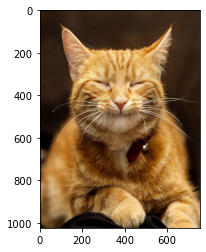

In [2]:
img = plt.imread('Image_ML/cat/1.jpg')
plt.imshow(img)

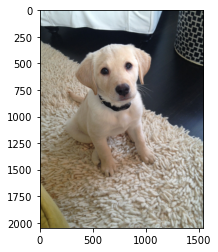

In [9]:
edges = filters.sobel(img)
plt.imshow(img)

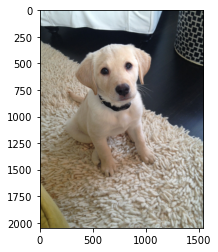

In [4]:
img = plt.imread('Image_ML/dog/2.jpg')
plt.imshow(img)

In [5]:
from skimage import io, filters

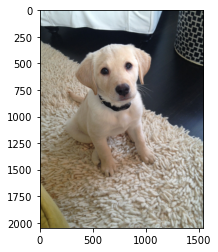

In [6]:
edges = filters.sobel(img)
plt.imshow(img)

In [7]:
def load_image_files(container_path, dimension=(64, 64)):
    
    """Loading Multiple Images From the Folder and Which Consists  of Different Shape of Data We Have to Bring them in 64 ,64 Shape
    as well as 
    Parameters
    ----------
    container_path : string or unicode of images in the SubFolders Path to the main folder holding one subfolder[Cat,Dog] 
    Each and Every category[Cat, Dog]
    Dimensions: We Have Bring Ddifferent Images into Same equal shape
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr ="""cat and Dog Image Classification Problem"""
    
    images = []
    flat_data = []
    target = []
    
    for i,direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            plt.imshow(img)
            #plt.show()
            
            # Convert Image Sahpe in 64 ,64
            img_resized =resize(img, dimension, anti_aliasing=True, mode='reflect')
            plt.imshow(img_resized)
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data=flat_data,
                target=target,
                target_name = categories,
                images= images,
                DESCR =descr )

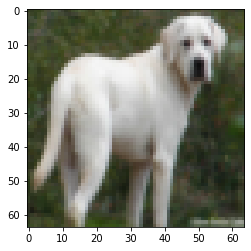

In [8]:
import skimage
image_dataset = load_image_files("Image_ML")

In [10]:
image_dataset.keys()

dict_keys(['data', 'target', 'target_name', 'images', 'DESCR'])

In [11]:
image_dataset.data

array([[0.1828125 , 0.11372549, 0.0573223 , ..., 0.65306373, 0.5314951 ,
        0.36211703],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99129902],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       ...,
       [0.87331495, 0.8828125 , 0.90242034, ..., 0.90196078, 0.91372549,
        0.93333333],
       [0.45490196, 0.4627451 , 0.34901961, ..., 0.1254902 , 0.0745098 ,
        0.04803922],
       [0.20784314, 0.24485294, 0.13504902, ..., 0.45765931, 0.51053922,
        0.42394684]])

In [12]:
image_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
image_dataset.target_name

['cat', 'dog']

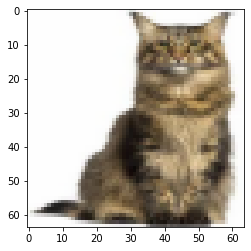

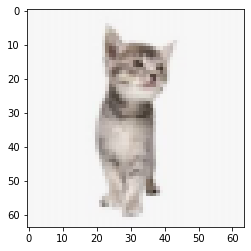

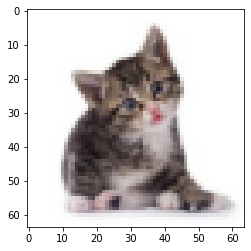

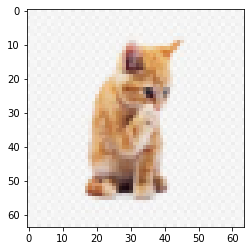

In [14]:
for I in range(6,10):
    plt.imshow(image_dataset.images[I])
    plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(image_dataset.data,image_dataset.target,random_state=1)
x_train.shape

(110, 12288)

In [33]:
x_test.shape

(37, 12288)

In [34]:
y_train.shape

(110,)

In [35]:
from sklearn.linear_model import LogisticRegression

In [20]:
Lr = LogisticRegression(solver='newton-cg',C=1.0,max_iter=100)

In [36]:
Lr.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [37]:
Lr.coef_

array([[ 0.02931772,  0.01916753, -0.00074468, ..., -0.00864941,
         0.00656634, -0.00884298]])

In [38]:
Lr.intercept_

array([5.39556546])

In [22]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [23]:
yhat_prob = Lr.predict_proba(x_test)
yhat_prob

array([[2.07754544e-01, 7.92245456e-01],
       [2.96733990e-05, 9.99970327e-01],
       [9.96451740e-01, 3.54826009e-03],
       [3.08321988e-03, 9.96916780e-01],
       [2.62759769e-04, 9.99737240e-01],
       [3.36594874e-03, 9.96634051e-01],
       [2.42589741e-05, 9.99975741e-01],
       [9.98290010e-01, 1.70998971e-03],
       [1.02822767e-02, 9.89717723e-01],
       [2.53346881e-04, 9.99746653e-01],
       [6.94916012e-01, 3.05083988e-01],
       [1.27269044e-02, 9.87273096e-01],
       [3.14568802e-01, 6.85431198e-01],
       [9.97942403e-01, 2.05759709e-03],
       [5.47856477e-01, 4.52143523e-01],
       [3.04547549e-03, 9.96954525e-01],
       [2.48830015e-03, 9.97511700e-01],
       [8.80146017e-01, 1.19853983e-01],
       [9.98204140e-01, 1.79586018e-03],
       [3.96006264e-01, 6.03993736e-01],
       [2.76511359e-05, 9.99972349e-01],
       [1.95957897e-01, 8.04042103e-01],
       [9.79250886e-01, 2.07491142e-02],
       [1.73245878e-02, 9.82675412e-01],
       [6.440733

In [40]:
Training_score = Lr.score(x_train,y_train)
Training_score

1.0

In [42]:
New_Predication = Lm_predication=Lr.predict(x_test)

In [43]:
Test_score = Lr.score(x_test,New_Predication)

In [44]:
Test_score

1.0

In [45]:
pd.DataFrame({"Actual_Data":y_test,
             "New_Predication":New_Predication})

,Actual_Data,New_Predication
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,0,0
8,0,1
9,0,1


In [52]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB,MultinomialNB,GaussianNB

In [54]:
Bnb = BernoulliNB()
Cnb = ComplementNB()
Mnb = MultinomialNB()
Gnb = GaussianNB()

In [56]:
Bnb.fit(x_train,y_train)

BernoulliNB()

In [57]:
Bnb.alpha

1.0

In [58]:
Train_Score = Bnb.score(x_train,y_train)

In [59]:
Train_Score

0.5545454545454546

In [61]:
Bnb_new_prediction = Bnb.predict(x_test)

In [63]:
Test_Score = Bnb.score(x_test,y_test)

In [64]:
Test_Score

0.4864864864864865

In [65]:
Cnb.fit(x_train,y_train)

ComplementNB()

In [66]:
Cnb.alpha

1.0

In [68]:
Train_Score = Cnb.score(x_train,y_train)

In [69]:
Train_Score

0.7454545454545455

In [70]:
Cnb_new_prediction = Cnb.predict(x_test)

In [71]:
Test_Score = Cnb.score(x_test,y_test)

In [72]:
Test_Score

0.6756756756756757

In [73]:
Mnb.fit(x_train,y_train)

MultinomialNB()

In [74]:
Mnb.alpha

1.0

In [76]:
Train_Score = Mnb.score(x_train,y_train)

In [77]:
Train_Score

0.7454545454545455

In [78]:
Mnb_new_prediction = Mnb.predict(x_test)

In [80]:
Test_Score = Mnb.score(x_test,y_test)

In [81]:
Test_Score

0.6756756756756757

In [82]:
Gnb.fit(x_train,y_train)

GaussianNB()

In [83]:
Train_Score = Gnb.score(x_train,y_train)

In [84]:
Train_Score

0.8181818181818182

In [85]:
Gnb_new_prediction = Gnb.predict(x_test)

In [86]:
Test_Score = Gnb.score(x_test,y_test)

In [87]:
Test_Score

0.7837837837837838

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
Knn = KNeighborsClassifier(n_neighbors=10)

In [90]:
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [92]:
Train_score = Knn.score(x_train,y_train)

In [93]:
Train_Score

0.8181818181818182

In [94]:
Test_score = Knn.score(x_test,y_test)

In [95]:
Test_score

0.8108108108108109

In [96]:
Knn.classes_

array([0, 1])

In [97]:
Knn.predict_proba(x_train)

array([[0.2, 0.8],
       [0.8, 0.2],
       [0.3, 0.7],
       [0.1, 0.9],
       [0.8, 0.2],
       [0.1, 0.9],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.9, 0.1],
       [1. , 0. ],
       [0. , 1. ],
       [0.3, 0.7],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.3, 0.7],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.3, 0.7],
       [0.3, 0.7],
       [0. , 1. ],
       [0.7, 0.3],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.2, 0.8],
       [0.7, 0.3],
       [0.3, 0.7],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.4, 0.6],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.7, 0.3],
       [0.1, 0.9],
       [0.1, 0.9],
       [1. , 0. ],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.1,

In [99]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, New_Predication)

0.625

In [100]:
from sklearn.metrics import confusion_matrix 

In [101]:
cm  = confusion_matrix(y_test, New_Predication)

In [102]:
print(cm)

[[13  6]
 [ 3 15]]


In [103]:
True_positive = cm[0,0]
True_positive

13

In [104]:
False_negative = cm[0,1]
False_negative

6

In [105]:
False_positive = cm[1,0]
False_positive

3

In [106]:
True_negative = cm[1,1]
True_negative

15

In [107]:
prediction_error = False_positive + False_negative /False_positive + False_negative + True_positive + True_negative

In [108]:
print(prediction_error)

39.0


In [109]:
Accuracy_model = True_positive + True_negative / False_positive + False_negative + True_positive + True_negative

In [110]:
Accuracy_model

52.0

In [111]:
Overall_model_correction = (0.625*100) + 39.0
Overall_model_correction

101.5

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, New_Predication, labels=[1,0]))


[[15  3]
 [ 6 13]]


Normalized confusion matrix
[[0.83 0.17]
 [0.32 0.68]]


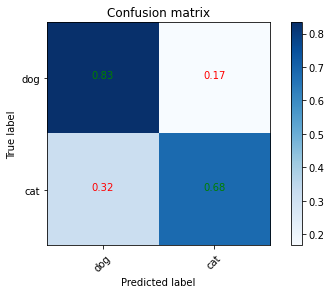

In [113]:
cnf_matrix = confusion_matrix(y_test, New_Predication, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['dog','cat'],normalize= True,  title='Confusion matrix')


In [114]:
print (classification_report(y_test, New_Predication))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        19
           1       0.71      0.83      0.77        18

    accuracy                           0.76        37
   macro avg       0.76      0.76      0.76        37
weighted avg       0.76      0.76      0.76        37



In [115]:
from sklearn.metrics import log_loss
log_loss(y_test, New_Predication)

8.401453652399386

In [116]:
y_pred_proba = Lr.predict_proba(x_test)[::,1]
print(y_pred_proba)
from sklearn import metrics

[7.92e-01 1.00e+00 3.55e-03 9.97e-01 1.00e+00 9.97e-01 1.00e+00 1.71e-03
 9.90e-01 1.00e+00 3.05e-01 9.87e-01 6.85e-01 2.06e-03 4.52e-01 9.97e-01
 9.98e-01 1.20e-01 1.80e-03 6.04e-01 1.00e+00 8.04e-01 2.07e-02 9.83e-01
 9.94e-01 7.32e-01 5.76e-04 1.83e-05 2.57e-01 1.00e+00 9.76e-01 4.71e-01
 2.05e-03 3.07e-01 3.82e-01 2.66e-01 9.98e-01]


In [117]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

In [118]:
fpr

array([0.  , 0.  , 0.  , 0.05, 0.05, 0.11, 0.11, 0.21, 0.21, 0.26, 0.26,
       0.32, 0.32, 0.42, 0.42, 0.53, 0.53, 1.  ])

In [119]:
tpr

array([0.  , 0.06, 0.22, 0.22, 0.39, 0.39, 0.56, 0.56, 0.78, 0.78, 0.83,
       0.83, 0.89, 0.89, 0.94, 0.94, 1.  , 1.  ])

In [120]:
_

array([2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 9.98e-01, 9.97e-01,
       9.94e-01, 9.87e-01, 7.92e-01, 7.32e-01, 6.85e-01, 6.04e-01,
       4.71e-01, 3.82e-01, 3.07e-01, 2.66e-01, 2.57e-01, 1.83e-05])

In [121]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.8421052631578947

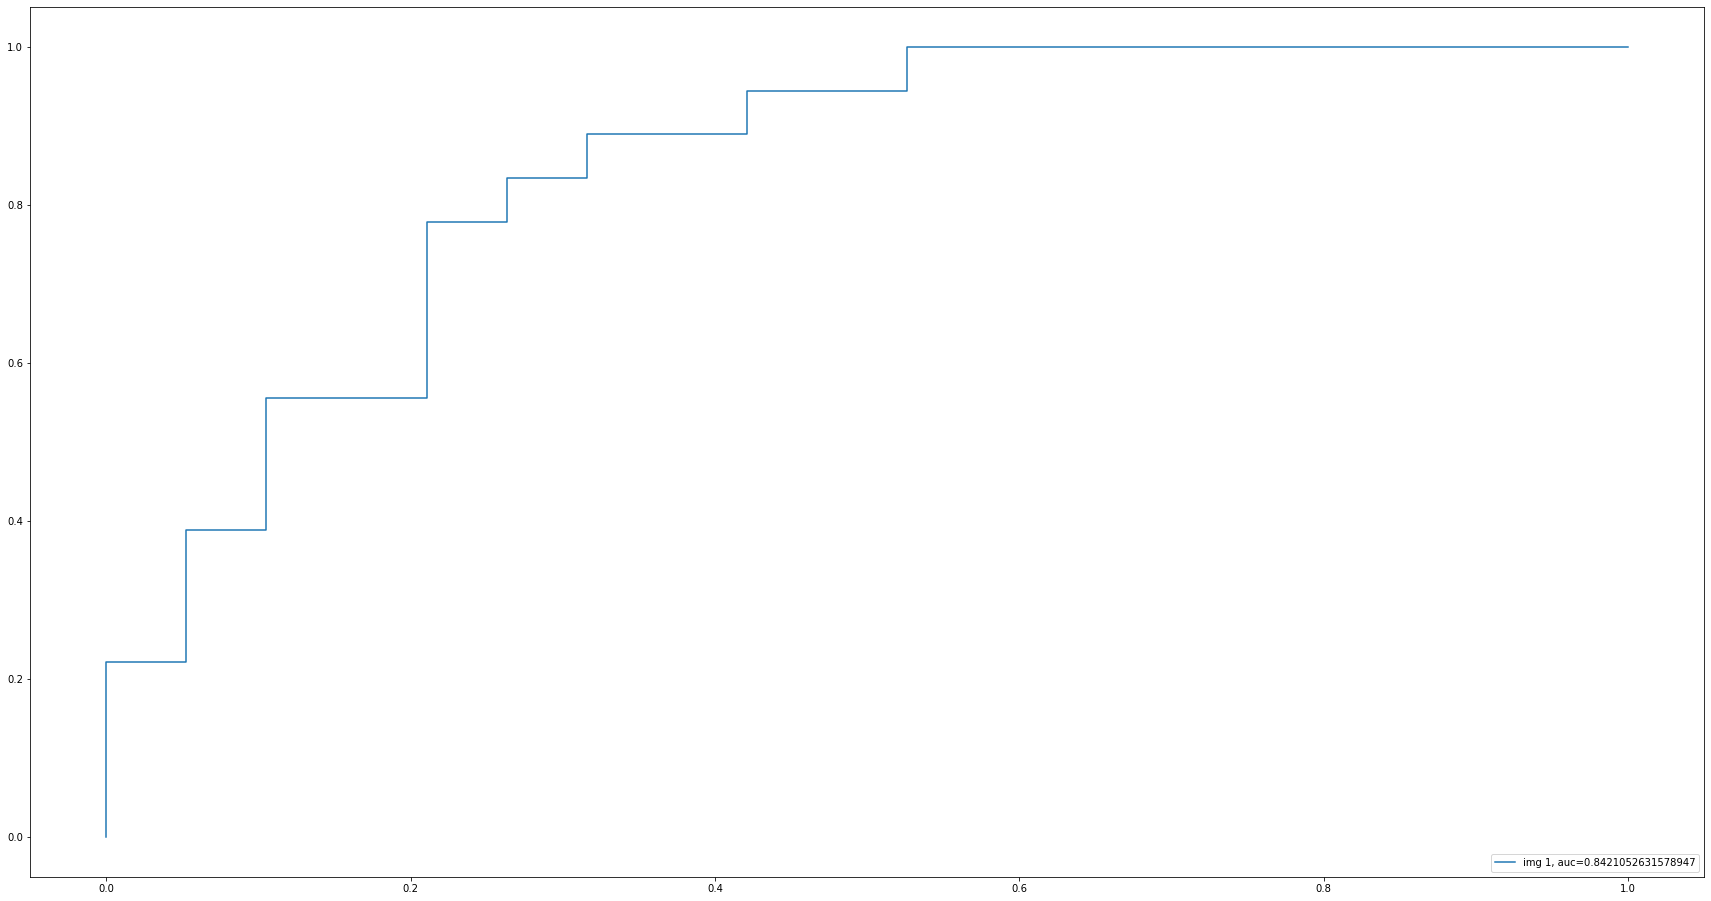

In [122]:
plt.figure(figsize=(30,16))
plt.plot(fpr,tpr,label="img 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [52]:
print(prediction_error)

39.0


In [53]:
Accuracy_model = True_positive + True_negative / False_positive + False_negative + True_positive + True_negative

In [54]:
Accuracy_model

52.0

In [56]:
Overall_model_correction = (0.6*100) + 39
Overall_model_correction

99.0